AI Programming - SW Lee

# Lab 05: Sequence Model of GRU
## Exercise: Sentiment Analysis of Movie Reviews
This exercise is based on the notebook in TensorFlow Tutorials.<br>
https://www.tensorflow.org/text/tutorials/text_classification_rnn

In [1]:
import os
# Set the backend of Keras to TensorFlow
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
import matplotlib.pyplot as plt

Loading IMDB standard dataset using the Keras dataset class.

num_words = 10000 signifies that only 10000 unique words will be taken for our dataset.

x_train, x_test: List of movie reviews text data. having an uneven length.

y_train, y_test: Lists of integer target labels (1 or 0).

In [2]:
#from keras.datasets import imdb
# Import the IMDB reviews dataset from TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load('imdb_reviews',
                                         split=['train', 'test'],  # + 'unsupervised'
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

print(ds_info.features)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.BNE4RM_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.BNE4RM_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.BNE4RM_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(), dtype=string),
})


We are defining max_len = 200. If a sentence is having a length greater than 200 it will be trimmed off otherwise it will be padded by 0.

In [3]:
# Initialize lists to store training and testing data
X_train = []
y_train = []

X_test_str = []
y_test = []

# Process the training dataset
for sentense, label in ds_train:
    X_train.append(sentense.numpy().decode('utf8'))
    y_train.append(label.numpy())

# Process the testing dataset
for sentense, label in ds_test:
    X_test_str.append(sentense.numpy().decode('utf8'))  # X_test_str is used at the test stage
    y_test.append(label.numpy())

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

In [4]:
# Print the first training review
print(X_train[0])
# Print whether the first review is positive or negative based on its label
print('The review is', 'Positive' if y_train[0]==1 else 'Negative')

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
The review is Negative


## Tokenizer and Integer encoding

In [5]:
# hyperparameter for word embeddings
vocab_size = 10000    # Vocabulary size
embedding_size = 128  # Dimension of each word embedding
max_length = 300      # Maximum length of each input sequence

### START CODE HERE ###
# Initialize tokenizer to vectorize text into integer sequences
tokenizer = keras.layers.TextVectorization(max_tokens=vocab_size,output_mode='int',output_sequence_length=max_length)
# Adapt tokenizer to training data vocabulary
tokenizer.adapt(X_train)

# Transform texts into integer sequences
X_train = tokenizer(X_train)
X_test  = tokenizer(X_test_str)

### END CODE HERE ###

input_length = maxlen Since we have already made all sentences in our dataset have an equal length of 200 using pad_sequence.
The Embedding layer takes n_unique_words as the size of the vocabulary in our dataset which we already declared as 10000.
After the Embedding layer, we are adding Bi-directional LSTM units.
Using sigmoid activation and then compiling the model

In [6]:
# Hyperparameter for model
hidden_states = 64
dropout_rate = 0.5

model = keras.Sequential() # Initialize a sequential model

### START CODE HERE ###

model.add(keras.layers.InputLayer(shape=(max_length, ))) # input layer
model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_size))  # embedding layer
model.add(keras.layers.Bidirectional(keras.layers.GRU(hidden_states)))  # bidirectional GRU layer
model.add(keras.layers.Dropout(dropout_rate))  # dropout layer
model.add(keras.layers.Dense(1, activation='sigmoid'))  # output layer

### END CODE HERE ###
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the model

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 300, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,354,625 (5.17 MB)

 Trainable params: 1,354,625 (5.17 MB)

 Non-trainable params: 0 (0.00 B)

**Expected Model Summary**

```
┏--------------------------------------┳-----------------------------┳-----------------┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡--------------------------------------╇-----------------------------╇-----------------┩
│ embedding_1 (Embedding)              │ (None, 300, 128)            │       1,280,000 │
┡--------------------------------------╇-----------------------------╇-----------------┩
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          74,496 │
┡--------------------------------------╇-----------------------------╇-----------------┩
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
┡--------------------------------------╇-----------------------------╇-----------------┩
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└--------------------------------------┴-----------------------------┴-----------------┘
 Total params: 1,354,625 (5.17 MB)
 Trainable params: 1,354,625 (5.17 MB)
 Non-trainable params: 0 (0.00 B)
```


#### **\### Network Analysis Assignment \###**
Derive how above **Param #** can be achieved.
#### **\### End of Assignment \###**

In [7]:
n_batch = 64

# Set up early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# Set up model checkpointing
mc = keras.callbacks.ModelCheckpoint('GRU_imdb.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit the model
results = model.fit(X_train, y_train,
            batch_size=n_batch,
            epochs=10,
            callbacks=[es, mc],
            validation_split=0.2)

print(results.history['loss'])
print(results.history['accuracy'])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6210 - loss: 0.6199
Epoch 1: val_accuracy improved from -inf to 0.79240, saving model to GRU_imdb.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.6213 - loss: 0.6196 - val_accuracy: 0.7924 - val_loss: 0.4556
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8504 - loss: 0.3692
Epoch 2: val_accuracy improved from 0.79240 to 0.82260, saving model to GRU_imdb.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8504 - loss: 0.3691 - val_accuracy: 0.8226 - val_loss: 0.4267
Epoch 3/10
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9019 - loss: 0.2592
Epoch 3: val_accuracy improved from 0.82260 to 0.85820, saving model to GRU_imdb.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9019 - loss: 0.2592 - val_accuracy: 0.8582 - val_loss: 0.3453
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9375 - loss: 0.1809
Epoch 4: val_accuracy improved from 0

Plot Convergence Graph

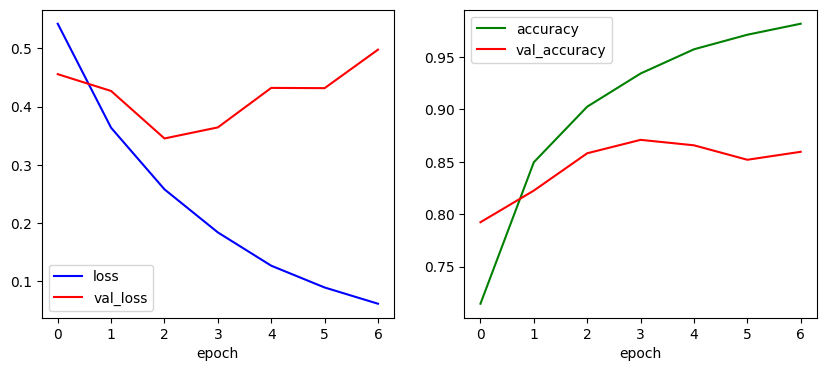

In [8]:
# plot loss and accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(results.history['loss'], 'b-', label='loss')
plt.plot(results.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(results.history['accuracy'], 'g-', label='accuracy')
plt.plot(results.history['val_accuracy'], 'r-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

Evaluate the model

In [9]:
# model = keras.models.load_model('GRU_imdb.keras')
model.evaluate(X_test, y_test) # Evaluate the model

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8289 - loss: 0.5871


[0.5812024474143982, 0.8278800249099731]

### Test Model with a random review

In [10]:
idx = np.random.randint(X_test.shape[0]) # Select a random index

X_input = tf.reshape(X_test[idx], shape=(1,-1)) # Reshape the selected test sample for model input

score = float(tf.squeeze(model.predict(X_input))) # Predict the score

# Determine the decision based on the score
decision = 1 if score>0.5 else 0
# Calculate the rate of confidence for the prediction
rate = score if decision==1 else (1-score)

print(X_test_str[idx])

print('The review is', 'Positive' if decision==1 else 'Negative', 'in {:.2f}% '.format(rate*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Idiots go camping and act like idiots before they finally die like idiots, yes Camp Blood (or if you're wanting an awful, badder than bad pun that suits a badder than bad film, "Camp Bloody awful"), is so bad it's actually quite depressing to watch. And it has all the ingredients to be a perfectly bad film... <br /><br />Awful acting-check. Bad script-check. Tacky effects-check no originality whatsoever-double check. <br /><br />It doesn't even attempt to be different, and is riddled with every predicted cliché imaginable. For example, the film opens to a couple having sex in the woods, so of course they end up dead. <br /><br />One of the most disturbing things is that this film actually spawned two sequels, how and why only baffles the mind. <br /><br />Just stay away from this one.
The review is Negative in 99.94% 


(c) 2024 SW Lee